# Lecture 3: Procesare imaginilor (cont)

## 2.1. Captarea imaginilor şi reprezentarea lor (lecture 2)

## 2.2. Operaţii asupra imaginilor (lecture 2)

## 2.3. Extragerea de informaţii relevante din imagini (this lecture)

Metodă de captare a conţinutului vizual al imaginilor în vederea indexării lor

Atribute vizuale - tipologie
- În funcţie de domeniu:
    * Generale
        - Ex. Culoare, textură, formă
        - Pot fi considerate la nivelul
            * unui pixel
            * unei regiuni de pixeli
            * întregii imagini
    * Specifice
        - Amprente
        - Feţe umane
- În funcţie de modul de extragere
    * De nivel primar
        - Extrase direct din imagine
    * De nivel înalt
        - Determinate pe baza atributelor de nivel primar
- Exemple de atribute
    * Contururi (margini ale unor regiuni)
    * Intersecţii (puncte de interes, colţuri)
    * Regiuni de interes
    * Creste 



# 2.3.1. Muchii si contururi

Muchia
- indica o modificare a culorii

> daca imaginea = o functie matematica 
> atunci muchia = schimbare rapida in aceasta functie 

<img src="images/edges.png" alt="edges" width="400"/>


## Identificarea muchiilor = identificarea punctelor de inflexiune in functia asociata imaginii
- => derivata functiei (de ordin 1 sau de ordin 2)

**Reamintire**

> Derivata unei functii: $f'(a) = lim_{\delta \rightarrow 0}{\frac{f(a + \delta) - f(a)}{\delta}}$, unde $a = (x,y)$ - coordonatele unui pixel, iar $f(a) = f((x,y))$ - nivelul de culoare al pixelului

> aproximarea derivatei pt $\delta = 1$ 

<img src="images/delta1.png" alt="delta1" width="150"/>

> aproximarea derivatei pt $\delta = 2$ 

<img src="images/delta2.png" alt="delta2" width="200"/>


Dar unele imagini au zgomot, deci trebuie netezite
- Cum? 
- Folosind un filtru Gaussian
    * de ex K_1 = [[1, 2, 1], [2, 4, 2], [1, 2, 1]]

Dupa eliminarea zgomotului, se poate calcula derivata.
- de ex pt. $\delta = 2$ avem un filtru $K_2 = 1/2 * [-1, 0, 1]$

> $ ImagineaNoua = K_2 * ( K_1 * ImagineaOriginala)$

<img src="images/sobelProcess.png" alt="sobel process" width="200"/>


> $ Imaginea noua = (K_2 * K_1) * Imaginea originala$

<img src="images/sobelProcess2.png" alt="sobel process" width="200"/>

> $ K_2 / 2 * K_1 = [[1, 0, -1], [2, 0, -2], [1, 0, -1]]$ = filtru Sobel 

Intrucat modificarile in functia imagine sunt in ambele sensuri (cresteri sau descresteri) este nevoie sa diferentiem intre ele => avem nevoie de derivata de ordin 2

<img src="images/deriv1and2.png" alt="local extrema" width="200"/>

**Reamintire**

> Derivata secundara a unei functii: $f''(a) = lim_{\delta \rightarrow 0}{\frac{f(a + \delta) - 2 * f(a) + f(a - \delta)}{\delta^2}}$, unde $a = (x,y)$ - coordonatele unui pixel, iar $f(a) = f((x,y))$ - nivelul de culoare al pixelului

> Laplacian-ul: $\Delta f = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2}$

<img src="images/laplacianImg.png" alt="local extrema" width="600"/>




### Filtre (pentru aproximarea derivatei) 

**De ordin I**
- Sobel 
    * filtru mic, separabil, cu ceoficienti intregi (necostisitor dpdv computational)
    * este util atat in diferentierea culorilor (edges), cat si in netezire (reducerea zgomotului) - actiuni concurentiale

    <img src="images/sobel.png" alt="orientation" width="400"/>

    * sta la baza algoritmului Cany (see [original paper](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.420.3300&rep=rep1&type=pdf) or this step-by-step [tutorial](https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123))
        > pas 1 - se reduce zgomotul in imagine printr-un filtru Gaussian (cu un anumit sigma) care netezeste imaginea (smoothing)

        > pas 2 - se calculeaza gradientul imaginii (folosind un filtru Sobel); magnitudinea gradientului indica puterea (intensitatea) muchiei

        > pas 3 - se subtiaza muchiile (se aplica algoritmul de non-maximum supression) pt a evita discontinuitatile si se selecteaza acele muchii determinate de pixeli cu gradient mare (double thresholding -> strong and weak edges)
        
        > pas 4 - se leaga punctele de tip muchie si se filtreaza (componente conexe)

- Schar (please read this [material](http://www.hlevkin.com/articles/SobelScharrGradients5x5.pdf) and play with it)

- Roberts Cross (please read this [material](http://homepages.inf.ed.ac.uk/rbf/HIPR2/roberts.htm#:~:text=Brief%20Description,image%2C%20as%20is%20the%20output.) and play with it)

- Prewitt
    * nu accentueaza importanta pixelilor din centrul filtrului
    
    <img src="images/prewitt.png" alt="orientation" width="400"/>

    * filtru separabil 

- Costella (please read this [material](http://johncostella.com/edgedetect/) and play with it)

**De ordin II: Operatori Laplacieni ai Gaussianului**

- se foloseste un singur kernel

    <img src="images/laplacian.png" alt="orientation" width="400"/>

- sensibil la zgomot  (se aplica un filtru gaussian pt smothing inainte de filtrarea cu Laplacian-ul)



Text(0.5, 1.0, 'all edges')

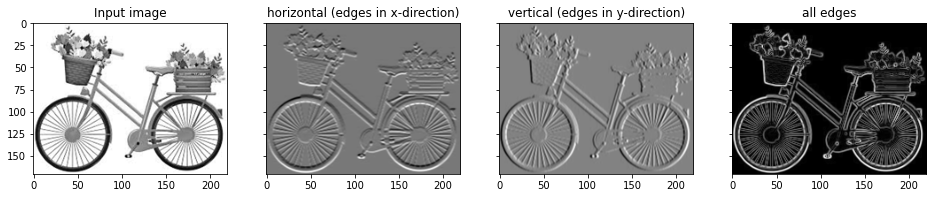

In [1]:
# edges by Sobel
from skimage import filters

import matplotlib.pyplot as plt
from skimage import io, exposure
from skimage.feature import hog

# read an image
crtDir =  os.getcwd()
# an image with a lot of white
filePath = os.path.join(crtDir, 'images', 'bike.png')
img = io.imread(filePath, as_gray=True)


#calculating horizontal edges using sobel kernel
edgesSobelHorizontal =  filters.sobel_h(img)
#calculating vertical edges using sobel kernel
edgesSobelVertical = filters.sobel_v(img)
# calculating all edges
edgesSobel = filters.sobel(img)


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 8), sharex=True, sharey=True)

ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.imshow(edgesSobelHorizontal, cmap=plt.cm.gray)
ax2.set_title('horizontal (edges in x-direction)')

ax3.imshow(edgesSobelVertical, cmap=plt.cm.gray)
ax3.set_title('vertical (edges in y-direction)')

ax4.imshow(edgesSobel, cmap=plt.cm.gray)
ax4.set_title('all edges')


Text(0.5, 1.0, 'all edges')

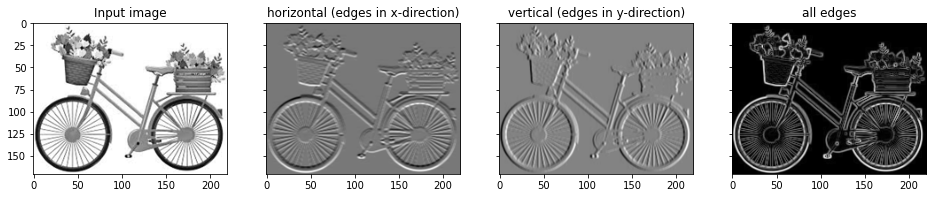

In [2]:
# edges by Prewitt
from skimage import filters

import matplotlib.pyplot as plt
from skimage import io, exposure
from skimage.feature import hog

# read an image
crtDir =  os.getcwd()
# an image with a lot of white
filePath = os.path.join(crtDir, 'images', 'bike.png')
img = io.imread(filePath, as_gray=True)


#calculating horizontal edges using prewitt kernel
edgesPrewittHorizontal = filters.prewitt_h(img)
#calculating vertical edges using prewitt kernel
edgesPrewittVertical = filters.prewitt_v(img)
# calculating all edges
edgesPrewitt = filters.prewitt(img)


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 8), sharex=True, sharey=True)

ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.imshow(edgesPrewittHorizontal, cmap=plt.cm.gray)
ax2.set_title('horizontal (edges in x-direction)')

ax3.imshow(edgesPrewittVertical, cmap=plt.cm.gray)
ax3.set_title('vertical (edges in y-direction)')

ax4.imshow(edgesPrewitt, cmap=plt.cm.gray)
ax4.set_title('all edges')


Text(0.5, 1.0, 'Laplace')

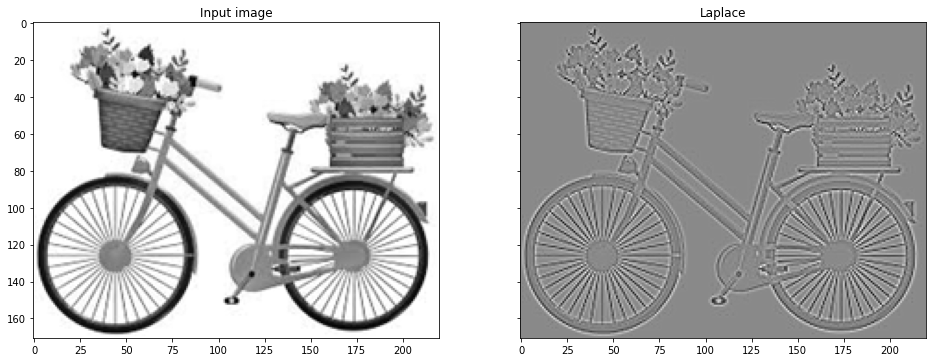

In [3]:
# edges by Laplace
from skimage import filters

import matplotlib.pyplot as plt
from skimage import io, exposure
from skimage.feature import hog

# read an image
crtDir =  os.getcwd()
# an image with a lot of white
filePath = os.path.join(crtDir, 'images', 'bike.png')
img = io.imread(filePath, as_gray=True)


#calculating horizontal edges using Laplace kernel
edgesLaplace =  filters.laplace(img)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)

ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.imshow(edgesLaplace, cmap=plt.cm.gray)
ax2.set_title('Laplace')



Text(0.5, 1.0, 'Canny')

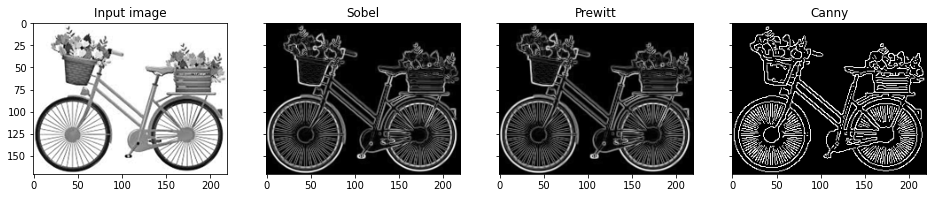

In [3]:
# edges by Canny
from skimage import feature

import matplotlib.pyplot as plt
from skimage import io, exposure
from skimage.feature import hog

# read an image
crtDir =  os.getcwd()
# an image with a lot of white
filePath = os.path.join(crtDir, 'images', 'bike.png')
img = io.imread(filePath, as_gray=True)


# calculating all edges by Canny
edgesCanny =  feature.canny(img)
#calculating vertical edges using prewitt kernel

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 8), sharex=True, sharey=True)

ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.imshow(edgesSobel, cmap=plt.cm.gray)
ax2.set_title('Sobel')

ax3.imshow(edgesPrewitt, cmap=plt.cm.gray)
ax3.set_title('Prewitt')

ax4.imshow(edgesCanny, cmap=plt.cm.gray)
ax4.set_title('Canny')


## Identificarea muchiilor = identificarea schimbarilor frecventelor inalte din imagine

Imaginea = ansamblu de frecvente (transformata Fourier - see [these](https://community.sw.siemens.com/s/article/what-is-the-fourier-transform) very nice explanations)

- componente cu frecvente inalte

- componente frecvente joase 

<img src="images/Fourier.png" alt="orientation" width="400"/>



Muchiile = schimbari ale componentelor cu frecvente inalte 


Reamintim:
> filtrul Gaussian: new pixel`s value = the weighted mean of the surrounding pixels that gives more weight to the pixel near the current pixel; low-pass filter $$G(x) = \frac{1}{\sqrt(2 * \pi) * \sigma} * e^{\frac{x^2}{2 * \sigma^2}}$$

> filtrul Gaussian reduce componentele a caror frecventa $ f < \sigma$ 

> prin filtrarea Gaussiana se obtin componentele cu frecventa redusa $$GaussFilter(\sigma) * Image$$

> componentele cu frecventa inalte sunt $$Image - GaussFilter(\sigma) * Image$$

> componentele cu frecventa intre 2 limite ($\sigma_1$, $\sigma_2$) sunt:  $$GaussFiler(\sigma_1) * Image - GaussFilter(\sigma_2) * Image = [GaussFiler(\sigma_1) - GaussFilter(\sigma_2)] * Image $$



Text(0.5, 1.0, 'DoG 3-2')

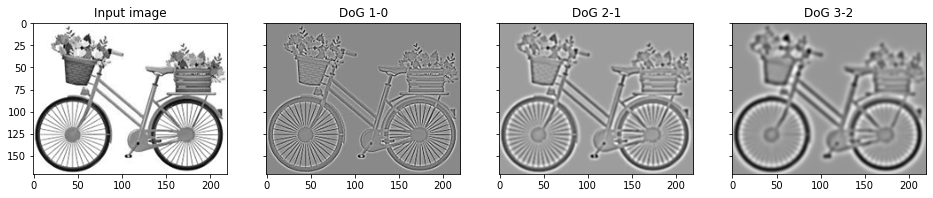

In [1]:
# edges by DoG
from skimage import filters

import matplotlib.pyplot as plt
from skimage import io, exposure
from skimage.feature import hog

# read an image
crtDir =  os.getcwd()
# an image with a lot of white
filePath = os.path.join(crtDir, 'images', 'bike.png')
img = io.imread(filePath, as_gray=True)


#calculating horizontal edges using diff of gauss
edgesDoG01 = filters.difference_of_gaussians(img,0,1)
edgesDoG12 = filters.difference_of_gaussians(img,1,2)
edgesDoG23 = filters.difference_of_gaussians(img,2,3)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 8), sharex=True, sharey=True)

ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.imshow(edgesDoG01, cmap=plt.cm.gray)
ax2.set_title('DoG 1-0')

ax3.imshow(edgesDoG12, cmap=plt.cm.gray)
ax3.set_title('DoG 2-1')

ax4.imshow(edgesDoG23, cmap=plt.cm.gray)
ax4.set_title('DoG 3-2')


# 2.3.2. Histograme de culoare

## Histograma culorii pixelilor
- Procentul fiecărei culori care apare în imagine (hk, k=1,2,...,K, K – nr. de culori)
- nu ţine cont de poziţia culorilor (se pierde informaţia regională) -> partiţionarea imaginii în regiuni şi determinarea histogramelor regionale (a se vedea lecture 2)
    
    
## Histograma gradienţilor orientaţi (Histogram of oriented gradients - HOG)
- propusa de Dalal in 2005 (see [original paper](https://lear.inrialpes.fr/people/triggs/pubs/Dalal-cvpr05.pdf))
- determinare
    * Gradientul unei imagini
        - O schimbare direcţională a intensităţii sau culorii într-o imagine 
        
            <img src="images/grad1.png" alt="gradient" width="200"/>
        
        - Este orientat în direcţia în care apare cea mai rapidă schimbare de culaore 
        
        <img src="images/grad2.png" alt="orientation" width="400"/>
        
        - Magnitudinea gradientului 
        
        <img src="images/grad3.png" alt="magnitude" width="300"/>
        
        - Se poate aproxima magnitudinea gradientului în cazul discret (domeniul spaţial al imaginii)
            * De ordin I – operatori  
                - Sobel 

                - Schar

                - Roeberts Cross
                
                - Prewitt
                
                - Costella

            * De ordin II: Operatori Laplacieni ai Gaussianului
                
        - Gradient = vectori orientaţi în direcţia celor mai semnificative schimbări de culoare
        
        - Paşi
            * pas 1: Se calculează magnitudinea fiecărui pixel
                - De ce?
                    * Magnitudinea = cât de abruptă este schimbarea
                - Cum?
                    * Pentru o imagine I de dimensiune nxm, se efectuează
                        - o convoluţie pe Ox cu un anumit filtru-mască Dx
                            > Ex. Dx = \[-1,0,1\], Ix = Dx*I
                        - o convoluţie pe Oy cu un anumit filtr-mască Dy 
                            > Ex. Dy = \[-1,0,1\]^T, Iy = Dy*I

            * pas 2: Se calculează gradientul orientat pentru fiecare pixel 
                - De ce?
                    * Orientarea -> direcţia modificărilor
                - Cum?
                    * $\theta = arctan(Iy/Ix)$ radians   <img src="images/arctg.png" alt="arctan" width="400"/>
                    * se transformă unghiul -> din radiani în grade 
                        > $\alpha = \theta * 180 / \Pi \in [-180,180]$
                    * se determină gradientul:
                        - cu semn - se translatează unghiul $\alpha$ din \[-180,180\] în \[0,360\]  <img src="images/signGrad.png" alt="signed" width="400"/>
                        - fără semn - se translatează unghiul $\alpha$ din \[-180,180\] în \[0,180\] <img src="images/unsignGrad.png" alt="unsigned" width="400"/>
                    * se obţine o matrice O cu nxm valori

            * pas 3: Se calculează histograma gradienţilor orientaţi folosind matricea O
                - Se împarte domeniul unghiului orientării D în k sectoare egale
                    * D = \[0, 360\] sau D = \[0, 180\]
                    * Primul sector va cuprinde unghiuri între 0 şi |D|/k, 
                    * Al doilea sector va cuprinde unghiuri între |D|/k şi 2*|D|/k 
                    * ş.a.m.d.
                    * k = 4, 8, 9, 16, 18, 36,...
                - Pentru fiecare sector se numără pixelii a căror orientare a gradientului cade în sectorul respectiv
                - Numărul de pixeli din fiecare sector se poate pondera cu
                    * Voturi binare – aparţine (1) sau nu (0) acelui sector
                    * Voturi bazate pe magnitudinea gradientului
                    * Voturi bazate pe pătratul magnitudinii
                    * Voturi bazate pe rădăcina pătrată a magnitudinii
                - Se reprezintă grafic valorile obţinute
                    * Pe axa Ox se trec sectoarele domeniului
                    * Pe axa Oy se trece numărul de pixeli (ponderat) din fiecare sector
- Nivele de calcul
    * La nivelul întregii imagini
    * La nivelul unei celule a imaginii
        - Câte imagini, atâtea histograme -> concatenarea histogramelor

- Îmbunătăţiri
    * Considerarea unor blocuri de celule
        - R-HOG
        - C-HOG
    * Normalizarea la nivel de bloc – pentru a ţine cont de “culorile vecine”
        - L2-norm
        - L1-Norm

- Parametri
    * Scara gradientului
    * Dimensiunea unei celule/unui bloc
    * Numărul de sectoare
    * Procentul suprapunerii blocurilor

- Instrumente
    * OpenCV -> www.opencv.org/
    * PMT - http://vision.ucsd.edu/~pdollar/toolbox/doc/
    * Altele 



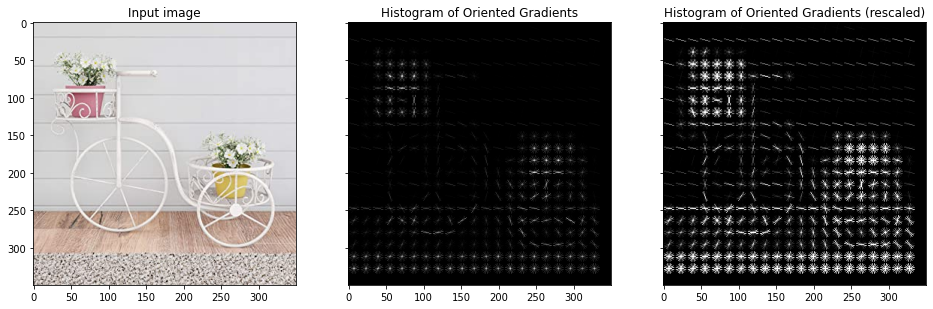

In [10]:
# HOG
import matplotlib.pyplot as plt
from skimage import io, exposure
from skimage.feature import hog

# read an image
crtDir =  os.getcwd()
# an image with a lot of white...a bad example
filePath = os.path.join(crtDir, 'images', 'bike.png')
#  an image with more uniform distributed colours
# filePath = os.path.join(crtDir, 'images', 'bike2.png')
# two images with low contrast
# filePath = os.path.join(crtDir, 'images', 'bike4.png')
# filePath = os.path.join(crtDir, 'images', 'bike5.png')
img = io.imread(filePath)
# plt.imshow(img)

hogDescriptor, hogView = hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)
# Rescale (to 0, 1) histogram for better display
hogViewRescaled = exposure.rescale_intensity(hogView, in_range=(0, 10))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 8), sharex=True, sharey=True)
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.imshow(hogView, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')

ax3.imshow(hogViewRescaled, cmap=plt.cm.gray)
ax3.set_title('Histogram of Oriented Gradients (rescaled)')

plt.show()

# 2.3.3. Textură

Caracteristica tactilă sau vizuală a unei suprafeţe

Elementele componente = texteli
- Forme geometrice care se repetă pe o suprafaţă

Tipologie
- Texturi slabe -> interacţii slabe între texteli
- Texturi puternice –> interacţii puternice între texteli

Cuantifică
- Diferenţele între nivelurile de gri (contrastul)
- Mărimea regiunii unde apar modificări (fereastră)
- Direcţia sau lipsa ei

Poate fi analizată prin metode
- Sintactice (structurale) 
        * relaţiile spaţiale din textură ~ gramatică (texteli – simboluri terminale, relaţiile – reguli de transformare)
- Statistice
    * De ordin I – calculate la nivel de pixel: 
        - Media 
            > $ \mu = \sum_{k=1, 2, \ldots, K}{k * p_k}$
        - Varianţa 
            > $\sigma^2 = \sum_{k=1, 2, \ldots, K}{(k - \mu)^2 * p_k}$
        - Turtirea (skewness) 
            > $\gamma_3 = \frac{1}{\sigma^3 * \sum_{k=1, 2, \ldots, K}{(k - \mu)^3 * p_k}}$
        - Excesul (kurtosis) 
            > $\gamma_4 = \frac{1}{\sigma^4 * \sum_{k=1, 2, \ldots, K}{(k - \mu)^4 * p_k - 3}}$, unde $p_k = \frac{h_k}{\sum_{k = 1, 2, \ldots, K}{h_k}}$ - procentul fiecărei culori care apare în imagine ($h_k, k = 1, 2, \ldots, K$, K – nr. de culori)
    * De ordin II – calculate la nivelul unei vecinătăţi de 2 pixeli
        - Matricea de co-ocurenţă a nivelurilor de gri
            > C(i,j)=cardinal{((x1,y1), (x2,y2)) pentru care f(x1,y1)=i şi f(x2,y2)=j, (x2,y2) = (x1,y1) + (d * cosӨ, d * sinӨ)}, i,j=1,2,...,K
        - Energia
            > $Energia = \sum_{i=1,2,...,K}{\sum_{j=1,2,...,K}{C(i,j)^2}}$ 
        - Inerţia
            > $Inertia = \sum_{i=1,2,...,K}{\sum_{j=1,2,...,K}{(i-j)^2 * C(i,j)}}$
        - Corelaţia   
            > $Corel = \sum_{i=1,2,...,K}{\sum_{j=1,2,...,K}{(ij) * C(i,j) - \frac{\mu_i * \mu_j}{\sigma_i * \sigma_j}}}$
        - Momentul diferenţei
            > $Mom dif = \sum_{i=1,2,...,K}{\sum_{j=1,2,...,K}{\frac{C(i,j)}{1+(i-j)^2}}}$
        - Entropia 
            > $Entropia = \sum_{i=1,2,...,K}{\sum_{j=1,2,...,K}{C(i,j) * \log{C(i,j)}}}$
        - Filtre Gabor
        - Atribute de tip Markov
        > unde:

        > $\mu_i = \sum_{i=1,2,...,K}{i \sum_{j=1,2,...,K}{C(i,j)}}$

        > $\mu_j = \sum_{j=1,2,...,K}{j \sum_{i=1,2,...,K}{C(i,j)}}$ 
            
        > $\sigma_i = \sum_{i=1,2,...,K}{(i - \mu_i)^2 \sum_{j=1,2,...,K} {C(i,j)}}$
            
        > $\sigma_j = \sum_{j=1,2,...,K}{(j - \mu_j)^2 \sum_{i=1,2,...,K} {C(i,j)}}$
            


# 2.3.4. Formă

Metode bazate pe
- Regiuni
    * Momentele geometrice
    * Momentele centrale şi momentele centrale normalizate
    * Invarianţii momentului
    * Momentele Zernike şi Legendre
    * Momentele complexe
- Contur
    * Circularitatea cir=4pA/P2
    * Rata aspectului ar=(p1+p2)/C
    * Iregularitatea unghiului de discontinuitate (∑|Өi-Өi+1|/2π(n-2))1/2
    * Iregularitatea lungimii lir= ∑|Li-Li+1|/K, unde K=2P pt n>3 şi K=P pt n=3
    * Complexitatea com=10-3/n

Detecţia contururilor
- Contururile sunt acolo unde apar schimbări de culoare
- Schimbările de direcţie ale unei funcţii pot fi detectate cu ajutorul derivatei I -> cele mai mari schimbări apar acolo unde derivata I are magnitudine (normă, mărime, dimensiune) maximă <=> derivata II = 0

<img src="images/contour.png" alt="edges" width="400"/>

Prewit and Sobel filters
<img src="images/prewitSobel.png" alt="filters" width="400"/>

# 2.3.5. Alti algoritmi pentru extragerea atributelor

- Scale-invariant feature transform (SIFT) <img src="images/sift.png" alt="SIFT" width="300"/>

    * http://www.cs.ubc.ca/~lowe/keypoints/ 

    * Biblioteca OpenCV http://opencv.willowgarage.com/wiki/ 

- Speeded Up Robust Features (SURF)
    * openCV

- Gradient Location and Orientation Histogram (GLOH)

- Local Energy based Shape Histogram (LESH)






** Extragerea atributelor trebuie ghidată cf. următoarelor principii **
- Atributele trebuie să conţină suficientă informaţie despre imagine şi nu trebuie folosite informaţii specifice în procesul de extracţie
- Atributele trebuie să fie uşor calculabile -> imagini mari şi numeroase 


** Materiale utile **

- https://github.com/jbhuang0604/awesome-computer-vision 

- http://www.vlsi.uwindsor.ca/presentations/2007/13-Neil.pdf

- http://cs.bilkent.edu.tr/~saksoy/courses/cs484-Fall2017/index.html

- http://homepages.inf.ed.ac.uk/rbf/CVonline/ 

- http://www.bzarg.com/p/how-a-kalman-filter-works-in-pictures/

- http://www.cs.tut.fi/~karen/Segmentation.pdf 

- http://www.cs.tut.fi/courses/SGN-1157/ 

- http://www.cs.tut.fi/courses/SGN-3057/ 


Next lecture: CNNs 